# Stroke Outcome Package Demo

`pip install stroke-outcome` if necessary.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stroke_outcome.continuous_outcome import Continuous_outcome

## Load example patients

The model needs the following data as inputs, with one value per patient in each array:

| Data | Units | Data type | Name |
| --- | --- | --- | --- |
| Stroke type code | 0=other, 1=nLVO, 2=LVO | int | `stroke_type_code` |
| Onset to needle time | minutes | float | `onset_to_needle_mins` |
| Whether IVT was chosen | 1=True, 0=False | int or bool | `ivt_chosen_bool` |
| Onset to puncture time | minutes | float | `onset_to_puncture_mins` |
| Whether MT was chosen | 1=True, 0=False | int or bool | `mt_chosen_bool` |

In [2]:
patients = pd.read_csv('example_patients.csv')
patients

,stroke_type_code,onset_to_needle_mins,ivt_chosen_bool,onset_to_puncture_mins,mt_chosen_bool
0,1,0,0,0,0
1,1,0,1,0,0
2,1,378,1,0,0
3,2,0,0,0,0
4,2,0,1,0,0
5,2,378,1,0,0
6,2,0,0,0,1
7,2,0,0,480,1
8,2,0,1,0,1
9,2,378,1,480,1


In [3]:
# Set up outcome model
continuous_outcome = Continuous_outcome()
# Assign patients to trial
continuous_outcome.assign_patients_to_trial(patients)
# Calculate outcomes
patient_data_dict, full_patient_breakdown , patient_outcomes = (
    continuous_outcome.calculate_outcomes())

In [4]:
patient_outcomes

{'each_patient_mrs_dist_post_stroke': array([[0.19714427, 0.46      , 0.58003201, 0.70776826, 0.85567719,
         0.91770198, 1.        ],
        [0.42980772, 0.63      , 0.73821237, 0.84842726, 0.92918765,
         0.95630045, 1.        ],
        [0.19727076, 0.46      , 0.57758322, 0.70225237, 0.84524353,
         0.90445421, 1.        ],
        [0.05      , 0.129     , 0.265     , 0.429     , 0.676     ,
         0.811     , 1.        ],
        [0.11291603, 0.2       , 0.32737746, 0.48475722, 0.69821167,
         0.81144281, 1.        ],
        [0.04789766, 0.12357596, 0.25385758, 0.4109619 , 0.64757633,
         0.7769    , 1.        ],
        [0.31408249, 0.43631515, 0.5544308 , 0.71233537, 0.85360364,
         0.91675   , 1.        ],
        [0.04778052, 0.12327374, 0.25323674, 0.40995684, 0.6459926 ,
         0.775     , 1.        ],
        [0.31408249, 0.43631515, 0.5544308 , 0.71233537, 0.85360364,
         0.91675   , 1.        ],
        [0.04789766, 0.12357596, 0.2

In [5]:
patients['mrs_post_stroke'] = patient_outcomes['each_patient_mrs_post_stroke'].round(3)
patients['mrs_shift'] = patient_outcomes['each_patient_mrs_shift'].round(3)
patients['utility'] = patient_outcomes['each_patient_utility_post_stroke'].round(3)
patients['utility_shift'] = patient_outcomes['each_patient_utility_shift'].round(3)

patients


,stroke_type_code,onset_to_needle_mins,ivt_chosen_bool,onset_to_puncture_mins,mt_chosen_bool,mrs_post_stroke,mrs_shift,utility,utility_shift
0,1,0,0,0,0,2.282,0.000,0.599,0.000
1,1,0,1,0,0,1.468,-0.814,0.745,0.145
2,1,378,1,0,0,2.313,0.032,0.595,-0.004
3,2,0,0,0,0,3.640,0.000,0.333,0.000
4,2,0,1,0,0,3.365,-0.275,0.388,0.056
5,2,378,1,0,0,3.739,0.099,0.319,-0.014
6,2,0,0,0,1,2.212,-1.428,0.603,0.270
7,2,0,0,480,1,3.745,0.105,0.318,-0.015
8,2,0,1,0,1,2.212,-1.428,0.603,0.270
9,2,378,1,480,1,3.739,0.099,0.319,-0.014


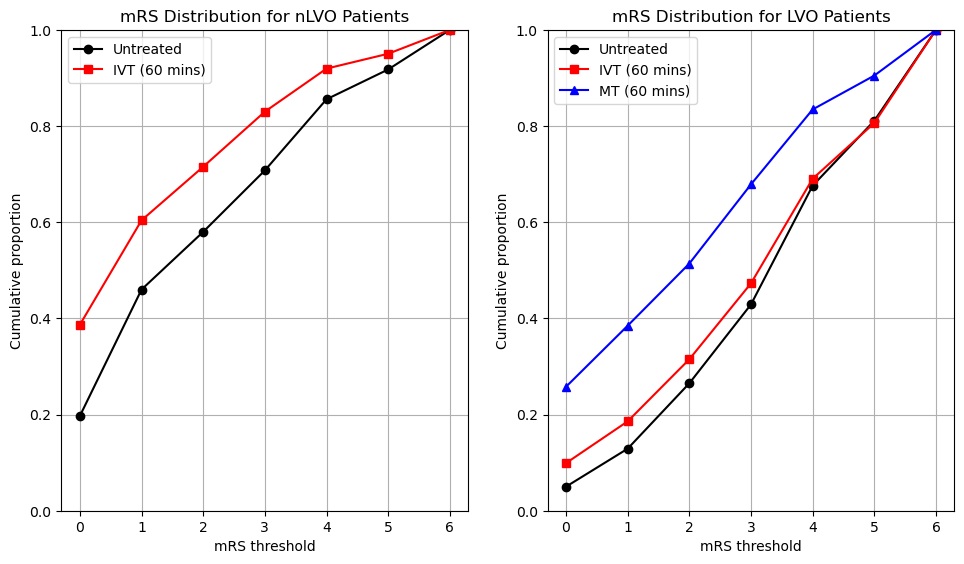

In [6]:
fig = plt.figure(figsize=(10, 6))
x = np.arange(0, 6.1)

# nLVO
ax1 = fig.add_subplot(121)
ax1.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][0],
           c='k',
           marker='o',
           label='Untreated')
ax1.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][10],
           c='r',
           marker='s',
           label='IVT (60 mins)')
ax1.set_ylim(0, 1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('mRS threshold')
ax1.set_ylabel('Cumulative proportion')
ax1.set_title('mRS Distribution for nLVO Patients')


# LVO
ax2 = fig.add_subplot(122)
ax2.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][3],
           c='k',
           marker='o',
           label='Untreated')
ax2.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][11],
           c='r',
           marker='s',
           label='IVT (60 mins)')
ax2.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][12],
           c='b',
           marker='^',
           label='MT (60 mins)')
ax2.set_xlabel('mRS threshold')
ax2.set_ylabel('Cumulative proportion')
ax2.set_ylim(0, 1)
ax2.legend()
ax2.set_title('mRS Distribution for LVO Patients')
ax2.legend()
ax2.grid()

plt.tight_layout(pad=2)
plt.savefig('mrs_dist.jpg', dpi=300)
plt.show()